### Implementação dos métodos do modelo integra dispara

In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as mplot
import numpy as numpy

In [3]:
# CONSTANTES

passos = 15000
dt = 0.01
Vrep = -60
Vreset = -70;
Vlimiar = -50;

In [4]:
def equacaoDaMembrana(t, V, RI = 0, tau = 10):
    return -(V - Vrep - RI)/tau;

In [5]:
def pulso(t0, tf, intensidade):
    pulso = numpy.zeros(passos)
    pulso[int(t0/dt):int(tf/dt)] = intensidade
    
    return pulso

In [6]:
def pulsoDuplo(ti1, tf1, ti2, tf2, i1, i2):
    pulso = numpy.zeros(passos)
    pulso[int(ti1/dt):int(tf1/dt)] = i1
    pulso[int(ti2/dt):int(tf2/dt)] = i2
    
    return pulso

In [7]:
def integraMembrana(eq, RI = numpy.zeros(passos), V0 = -60, tau = 10):
    
    V = numpy.zeros(passos)
    t = numpy.arange(passos) * dt
    spikes = []
    
    V[0] = V0
    
    for i in range(passos - 1):
        V[i + 1] = V[i] + dt * eq(t[i], V[i], RI[i] , tau = tau)
        if(V[i + 1] >= Vlimiar):
            V[i + 1] = Vreset
            spikes.append(i)
        
    return t, V, spikes


In [8]:
def fI(I, tau = 10):
    x = (Vrep + I - Vreset) / (Vrep + I - Vlimiar)
    return 1/(tau * numpy.log(x))        

### Questão 1

<IPython.core.display.Javascript object>


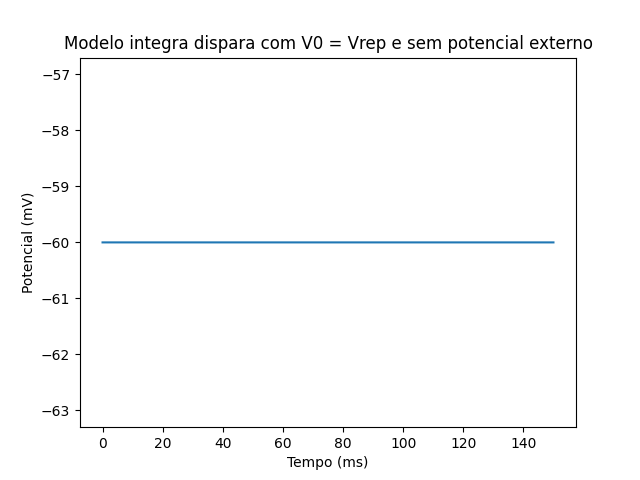

Text(0.5, 1.0, 'Modelo integra dispara com V0 = Vrep e sem potencial externo')

In [9]:
#Sem potencial externo
t, V, spikes = integraMembrana(equacaoDaMembrana)

mplot.figure()
mplot.plot(t, V)

mplot.ylabel('Potencial (mV)')
mplot.xlabel('Tempo (ms)')
mplot.title('Modelo integra dispara com V0 = Vrep e sem potencial externo')

<IPython.core.display.Javascript object>


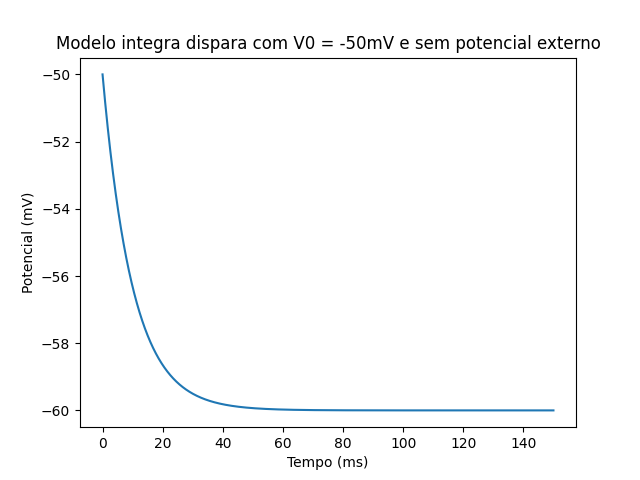

Text(0.5, 1.0, 'Modelo integra dispara com V0 = -50mV e sem potencial externo')

In [10]:
#Sem potencial externo com V0 = -50
t, V, spikes = integraMembrana(equacaoDaMembrana, V0 = -50)

mplot.figure()
mplot.plot(t, V)

mplot.ylabel('Potencial (mV)')
mplot.xlabel('Tempo (ms)')
mplot.title('Modelo integra dispara com V0 = -50mV e sem potencial externo')

<IPython.core.display.Javascript object>


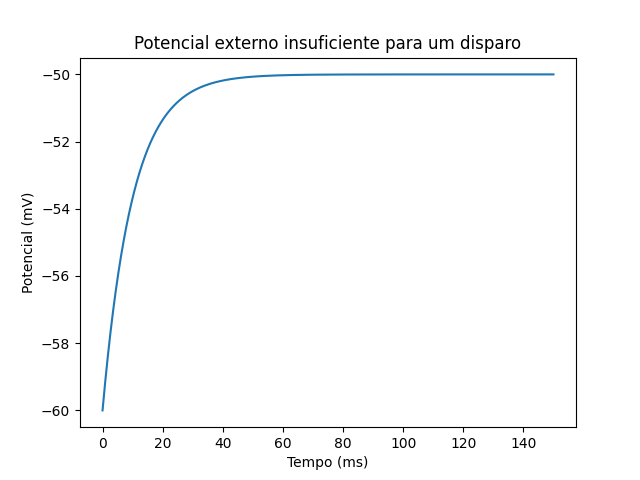

<IPython.core.display.Javascript object>


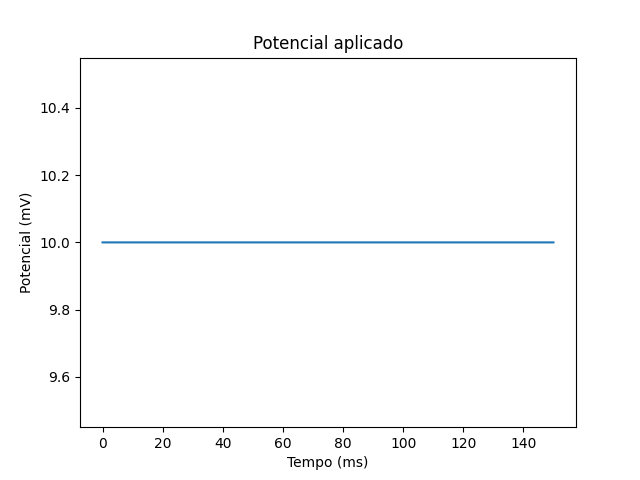

Text(0.5, 1.0, 'Potencial aplicado')

In [11]:
#Com potencial externo insuficiente
p = pulso(0, 150, 10)
t, V, spikes = integraMembrana(equacaoDaMembrana, RI = p)

mplot.figure()
mplot.plot(t, V)

mplot.ylabel('Potencial (mV)')
mplot.xlabel('Tempo (ms)')
mplot.title('Potencial externo insuficiente para um disparo')

mplot.figure()
mplot.plot(t, p)
mplot.xlabel('Tempo (ms)')
mplot.ylabel('Potencial (mV)')
mplot.title('Potencial aplicado')

<IPython.core.display.Javascript object>


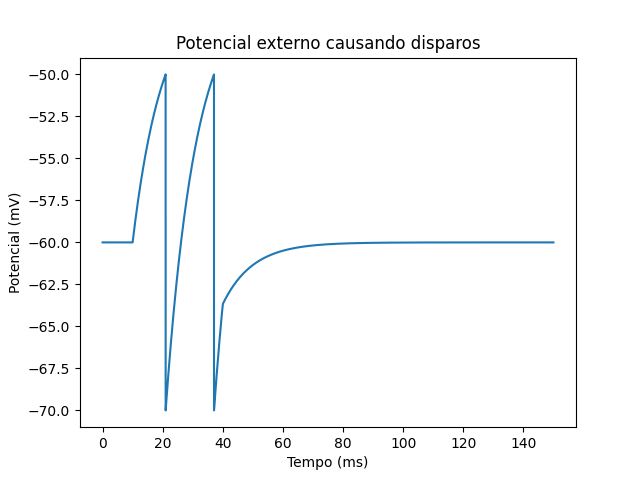

<IPython.core.display.Javascript object>


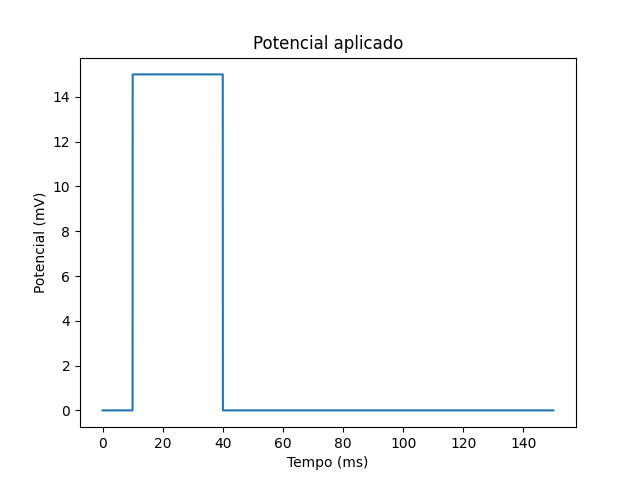

Text(0.5, 1.0, 'Potencial aplicado')

In [12]:
#Com potencial externo suficiente para UM disparo
p = pulso(10, 40, 15)
t, V, spikes = integraMembrana(equacaoDaMembrana, RI = p)

mplot.figure()
mplot.plot(t, V)

mplot.ylabel('Potencial (mV)')
mplot.xlabel('Tempo (ms)')
mplot.title('Potencial externo causando disparos')

mplot.figure()
mplot.plot(t, p)
mplot.xlabel('Tempo (ms)')
mplot.ylabel('Potencial (mV)')
mplot.title('Potencial aplicado')

### Questão 2

<IPython.core.display.Javascript object>


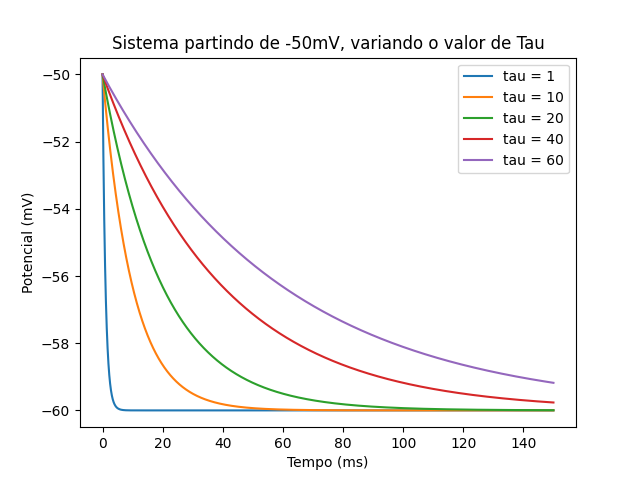

In [13]:
# Variando o valor de "tau"


mplot.figure()
mplot.xlabel('Tempo (ms)')
mplot.ylabel('Potencial (mV)')
mplot.title('Sistema partindo de -50mV, variando o valor de Tau')

for tau in [1, 10, 20, 40, 60]:
    t, V, spikes = integraMembrana(equacaoDaMembrana, V0 = -50, tau = tau)
    mplot.plot(t, V, label = f'tau = {tau}')
    mplot.legend(loc="upper right")

### Questão 3

<IPython.core.display.Javascript object>


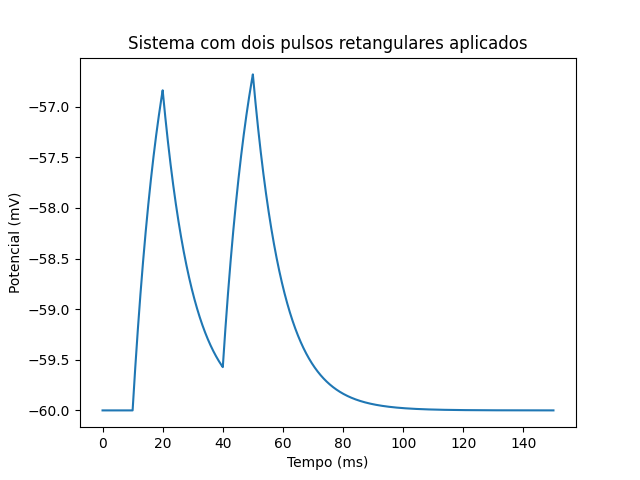

<IPython.core.display.Javascript object>


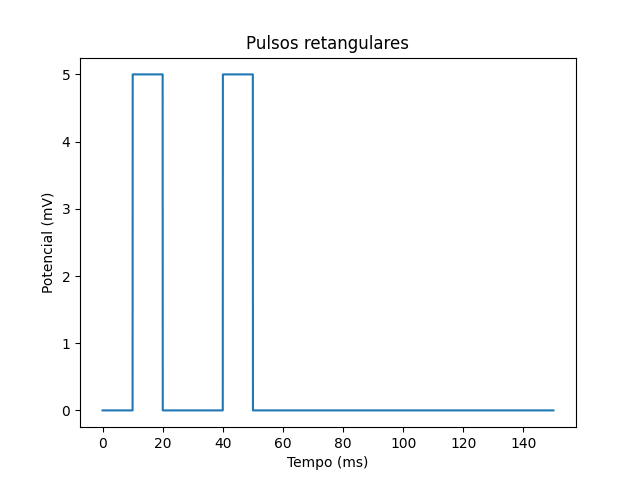

In [14]:
# Comportamento do sistema com dois pulsos retangulares
# Dois pulsos insuficientes

mplot.figure()
mplot.xlabel('Tempo (ms)')
mplot.ylabel('Potencial (mV)')
mplot.title('Sistema com dois pulsos retangulares aplicados')

RI = pulsoDuplo(10, 20, 40, 50, 5, 5)

t, V, spikes = integraMembrana(equacaoDaMembrana, RI = RI)
mplot.plot(t, V)

mplot.figure()
mplot.xlabel('Tempo (ms)')
mplot.ylabel('Potencial (mV)')
mplot.title('Pulsos retangulares')
mplot.plot(t, RI)


<IPython.core.display.Javascript object>


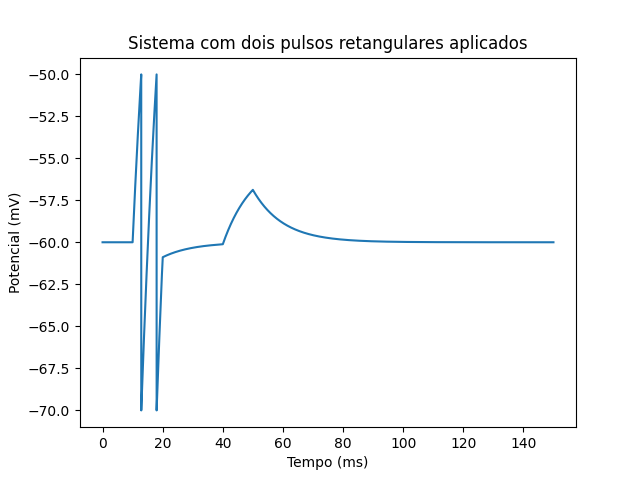

<IPython.core.display.Javascript object>


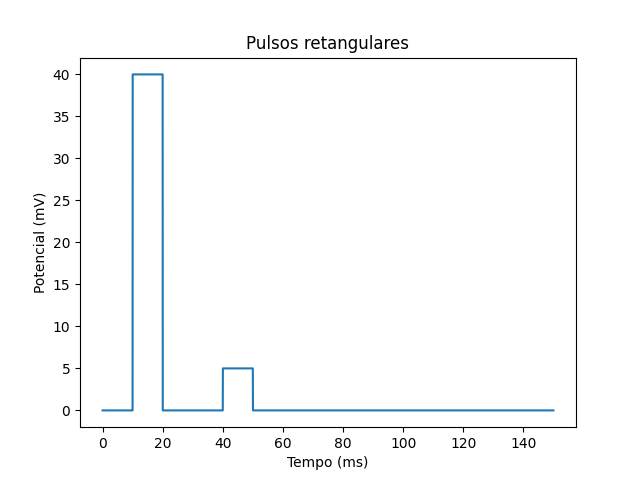

In [15]:
#Primeiro pulso causa disparo segundo não

mplot.figure()
mplot.xlabel('Tempo (ms)')
mplot.ylabel('Potencial (mV)')
mplot.title('Sistema com dois pulsos retangulares aplicados')

RI = pulsoDuplo(10, 20, 40, 50, 40, 5)

t, V, spikes = integraMembrana(equacaoDaMembrana, RI = RI)
mplot.plot(t, V)

mplot.figure()
mplot.xlabel('Tempo (ms)')
mplot.ylabel('Potencial (mV)')
mplot.title('Pulsos retangulares')
mplot.plot(t, RI)

<IPython.core.display.Javascript object>


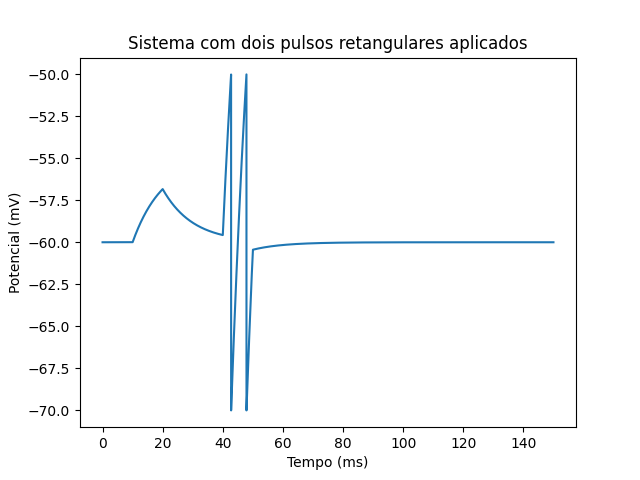

<IPython.core.display.Javascript object>


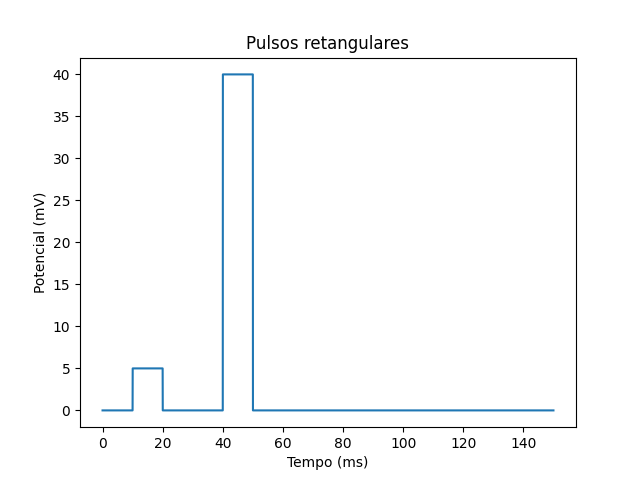

In [16]:
#Primeiro pulso não causa disparo, o segundo sim

mplot.figure()
mplot.xlabel('Tempo (ms)')
mplot.ylabel('Potencial (mV)')
mplot.title('Sistema com dois pulsos retangulares aplicados')

RI = pulsoDuplo(10, 20, 40, 50, 5, 40)

t, V, spikes = integraMembrana(equacaoDaMembrana, RI = RI)
mplot.plot(t, V)

mplot.figure()
mplot.xlabel('Tempo (ms)')
mplot.ylabel('Potencial (mV)')
mplot.title('Pulsos retangulares')
mplot.plot(t, RI)

<IPython.core.display.Javascript object>


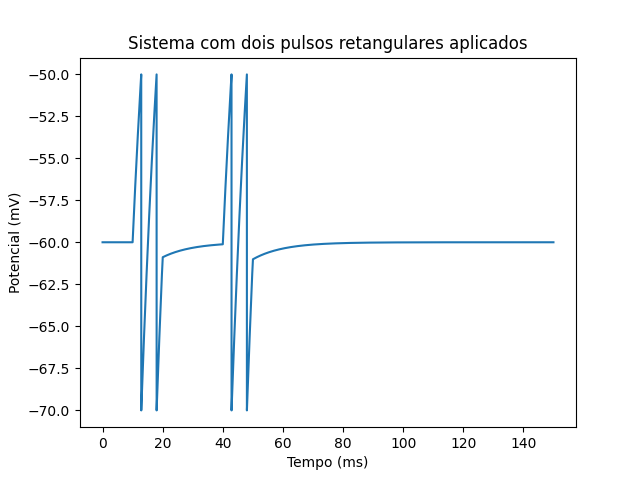

<IPython.core.display.Javascript object>


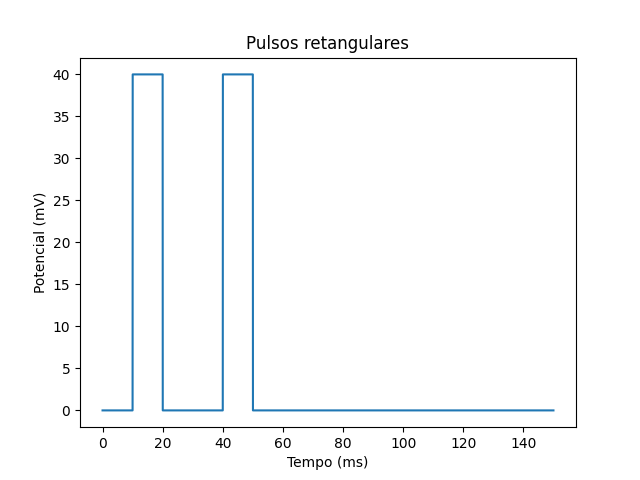

In [17]:
#Ambos causam disparos

mplot.figure()
mplot.xlabel('Tempo (ms)')
mplot.ylabel('Potencial (mV)')
mplot.title('Sistema com dois pulsos retangulares aplicados')

RI = pulsoDuplo(10, 20, 40, 50, 40, 40)

t, V, spikes = integraMembrana(equacaoDaMembrana, RI = RI)
mplot.plot(t, V)

mplot.figure()
mplot.xlabel('Tempo (ms)')
mplot.ylabel('Potencial (mV)')
mplot.title('Pulsos retangulares')
mplot.plot(t, RI)

<IPython.core.display.Javascript object>


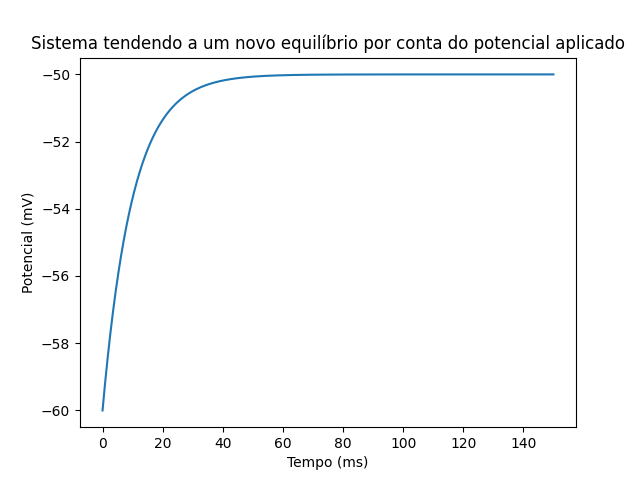

<IPython.core.display.Javascript object>


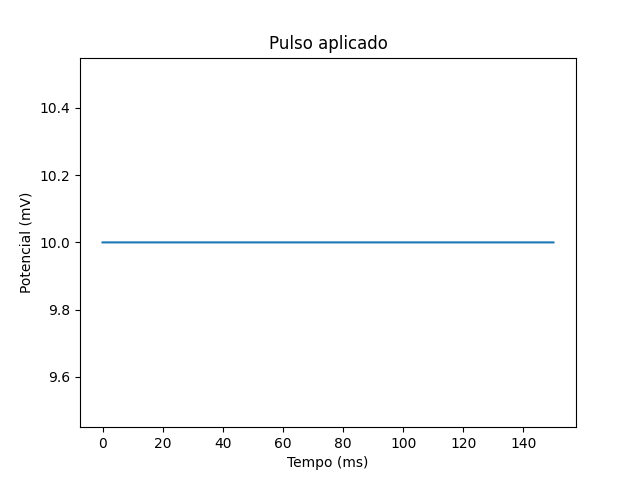

In [18]:
RI = pulso(0, 150, 10)
t, V, spikes = integraMembrana(equacaoDaMembrana, RI = RI)

mplot.figure()
mplot.xlabel('Tempo (ms)')
mplot.ylabel('Potencial (mV)')
mplot.title('Sistema tendendo a um novo equilíbrio por conta do potencial aplicado')
mplot.plot(t, V)

mplot.figure()
mplot.xlabel('Tempo (ms)')
mplot.ylabel('Potencial (mV)')
mplot.title('Pulso aplicado')
mplot.plot(t, RI)


### Questão 5

<IPython.core.display.Javascript object>


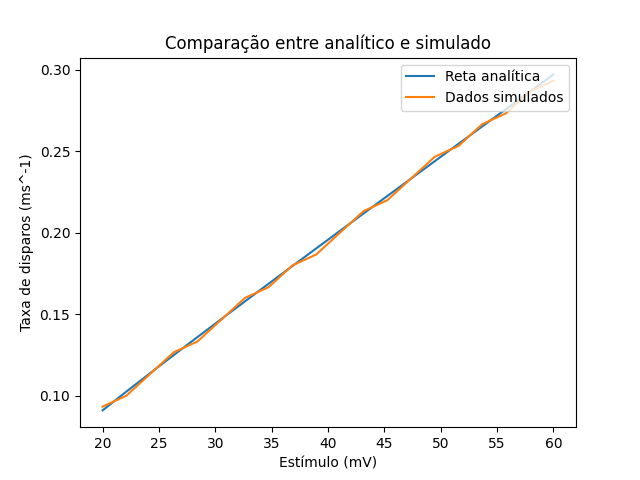

In [19]:
mplot.figure()
estimulos = numpy.linspace(20, 60, 20)

mplot.plot(estimulos, fI(estimulos), label = 'Reta analítica')
mplot.title('Comparação entre analítico e simulado')
mplot.xlabel('Estímulo (mV)')
mplot.ylabel('Taxa de disparos (ms^-1)')

txsDisparos = []
for i in estimulos:
    RI = pulso(0, passos * dt, i)
    t, V, spikes = integraMembrana(equacaoDaMembrana, RI = RI)
    txsDisparos.append(len(spikes)/(passos * dt))

mplot.plot(estimulos, txsDisparos, label = 'Dados simulados')
mplot.legend(loc="upper right")


### Questão 7

In [45]:
Vrep1 = -78
Vrep2 = -70
Vrep3 = - 60
Vlimiar = -54

def equacaoUpDown(V, RI = 0, tau = 10):
    aux = (Vrep1 - V) * (Vrep2 - V) * (Vrep3 - V)
    return (aux + RI)/tau

def integraUpDown(RI = numpy.zeros(passos), V0 = -60, tau = 10):
    
    V = numpy.zeros(passos)
    t = numpy.arange(passos) * dt
    spikes = []
    
    V[0] = V0
    
    for i in range(passos - 1):
        V[i + 1] = V[i] + dt * equacaoUpDown(V[i], RI = RI[i] , tau = tau)
        if(V[i + 1] >= Vlimiar):
            V[i + 1] = Vreset
            spikes.append(i)
        
    return t, V, spikes

<IPython.core.display.Javascript object>


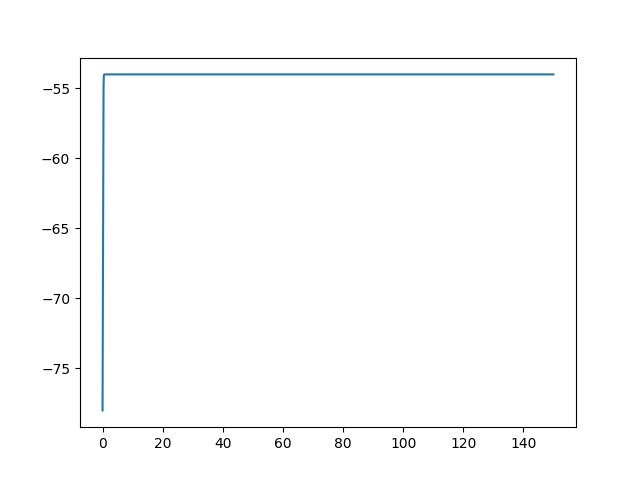

<IPython.core.display.Javascript object>


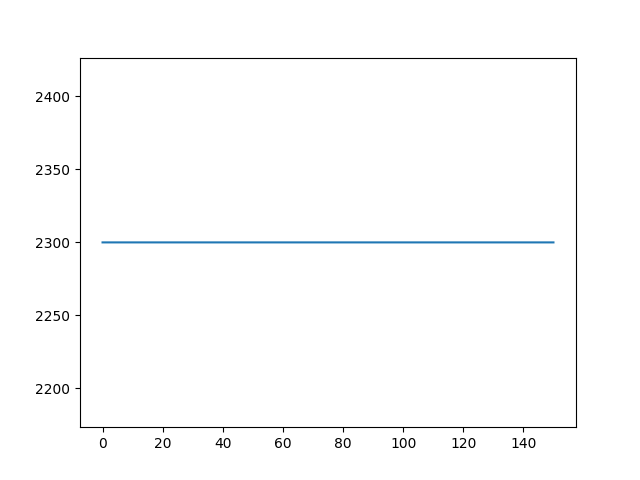

In [46]:
mplot.figure()
RI = pulso(0, passos * dt, 2300)
t, V, spikes = integraUpDown(V0 = Vrep1, RI = RI, tau = 30)
mplot.plot(t,V)
mplot.figure()
mplot.plot(t,RI)
